# PLOTTING RESULTS OF HYPERPARAMETER TUNING

In [1]:
import pandas as pd
import sys
sys.path.append("../../Model/")
import modules.constants as const
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import torch

import modules.utils as utils
import modules.plot_utils as plutils
import modules.plot_constants as pltconst
from modules.plot_constants import uzh_colors

from tqdm import tqdm
from matplotlib.lines import Line2D

In [2]:
tables_dir = const.tezos_results_dir + "Hyperparameter_tuning/Tables/"
figures_dir = const.tezos_results_dir + "Hyperparameter_tuning/Figures/"

In [3]:
pltconst.set_plot_parameters()

## One Figure Set as Input

### Number of Hidden Neurons and Learning rate

In [4]:
df1 = pd.read_csv(tables_dir + "Simple/Benchmark_neurons_vs_lr_multi_data.csv")
df2 = pd.read_csv(tables_dir + "Simple/Training_curves_benchmark1.csv")
df3 = pd.read_csv(tables_dir + "Simple/Validation_curves_benchmark1.csv")

df_train_curves = utils.convert_string_arrays_in_df(df2)
df_val_curves =utils.convert_string_arrays_in_df(df3)

#### Training Loss

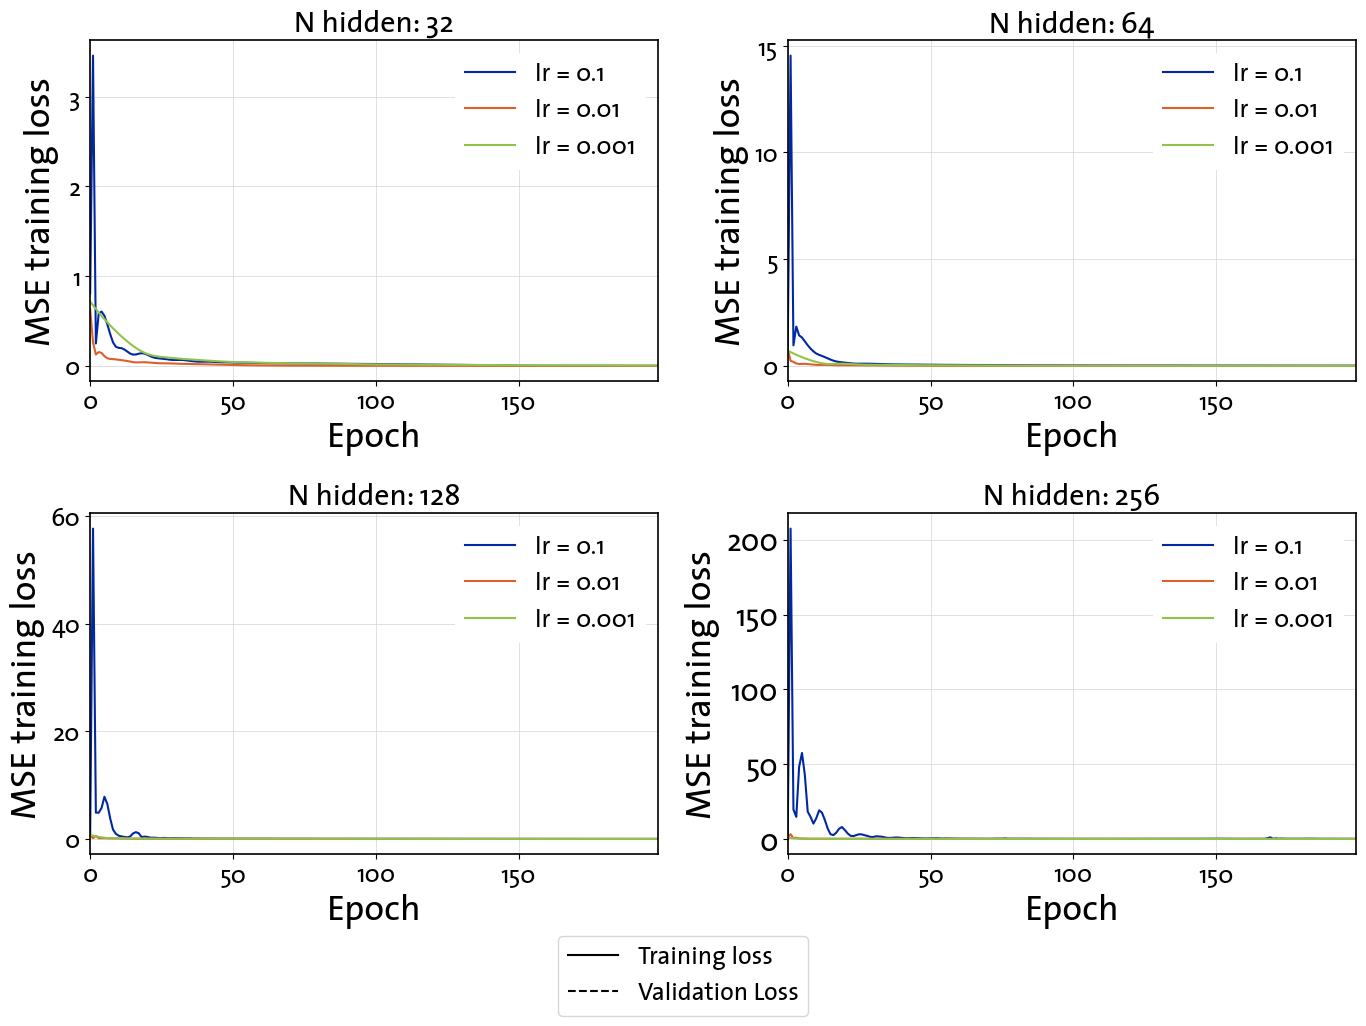

In [5]:
# title = "Training Loss Curves for Different Hyperparameter Combinations - One Feature Set"
title = ""
# file_path = figures_dir + "Training_loss_combinations_one.png"
file_path = None
plutils.get_configuration_subplots_training_loss(df_train_curves=df_train_curves, title = title, file_path=file_path)

#### Train and validation loss for selected combinations

Since the learning rate of 0.1 has a significantly larger training and validation error, we now consider only the other 2 learning rates

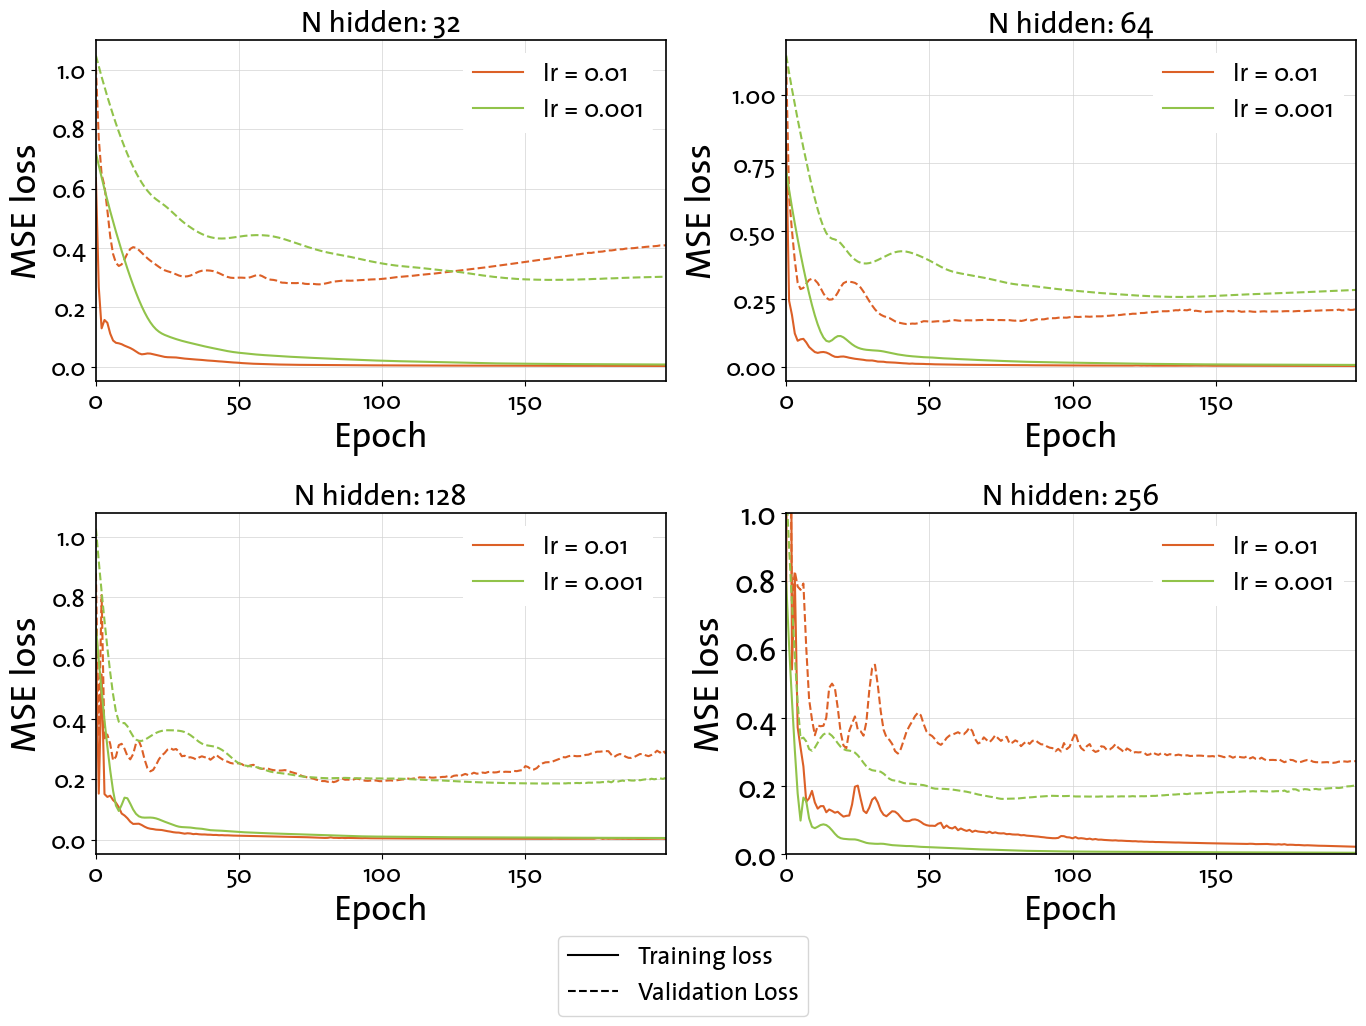

In [6]:
# title = "Training and Validation Loss Curves for Different Hyperparameter Combinations - One Data Group"
file_path = figures_dir + "Training_validation_loss_combinations_one.png"
title = ""

df_train_curves_temp = df_train_curves.loc[[1,2]]
plutils.get_configuration_subplots_training_loss(df_train_curves=df_train_curves_temp, title = title, file_path=file_path, df_validation_curves=df_val_curves, do_ylim=True)

### Batch Sizes

In [12]:
batches_file = tables_dir + "Simple/Batch_size_variations.csv"
batches_df = pd.read_csv(batches_file)
batches_df = utils.convert_string_arrays_in_df(batches_df)

save_fig = True
figure_path = figures_dir + "Batch_size_tuning.png"


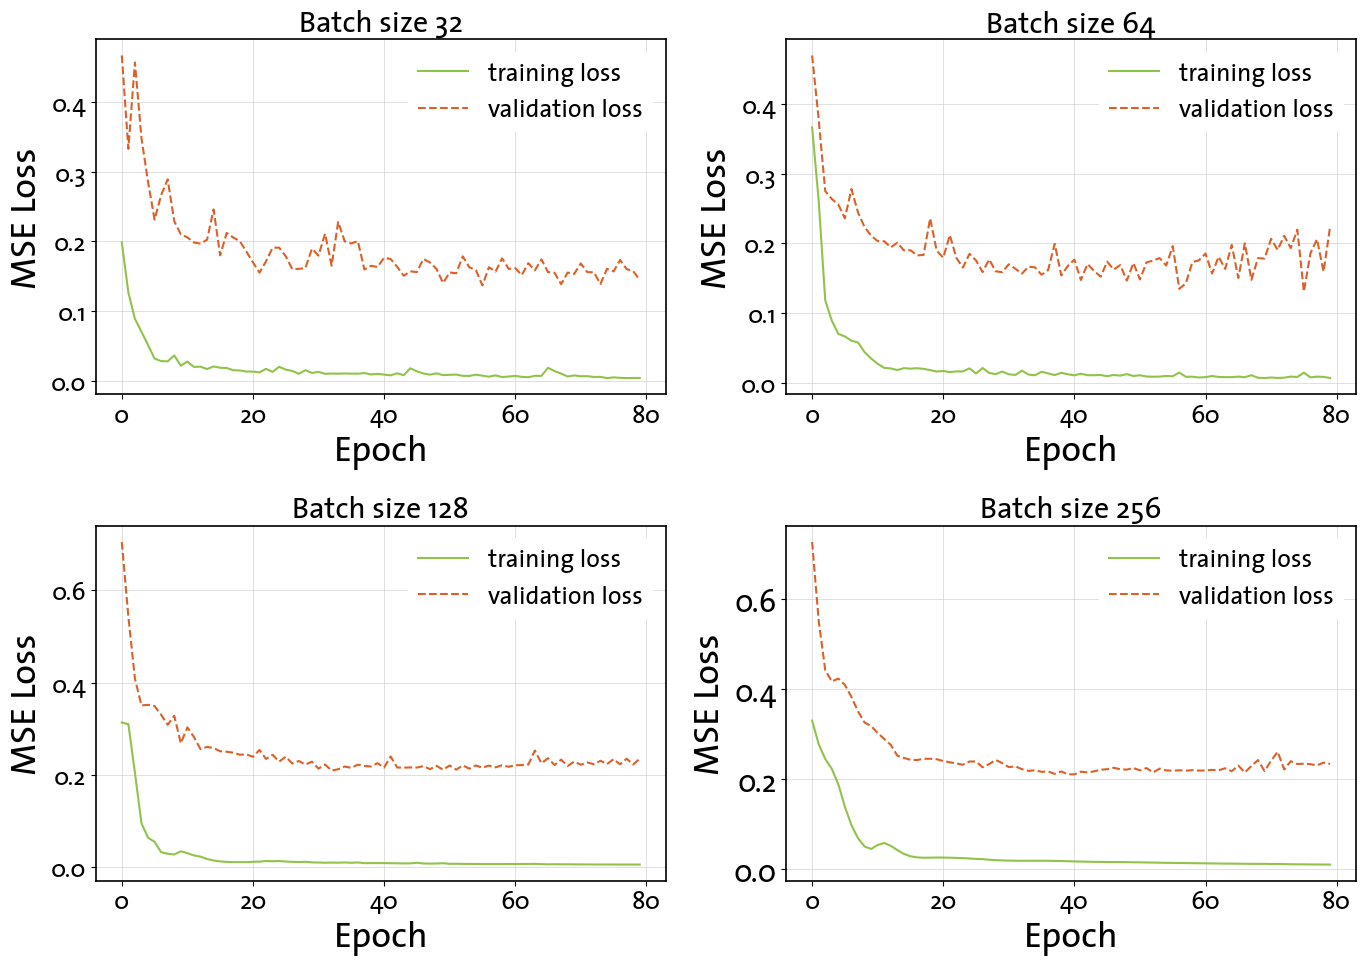

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
CUTOFF = 80
              
for i, ax in enumerate(axes.flatten()):
    df_row = batches_df.loc[i,].to_dict()

    train_data = df_row["training_curve"][:CUTOFF]
    val_data = df_row["validation_curve"][:CUTOFF]
    time = range(len(train_data))

    ax.plot(time, train_data, linestyle="-", label="training loss", color=uzh_colors["green"])
    ax.plot(time, val_data, linestyle="--", label="validation loss", color=uzh_colors["red"])

    ax.set_title(f"Batch size {df_row['batch_size']}")
    ax.set_ylabel("MSE Loss")
    ax.set_xlabel("Epoch")
    ax.legend()

    ax.grid(zorder=100, lw =0.5, color = 'lightgray')
    leg = ax.legend(frameon=True,facecolor='white', framealpha=1)
    frame = leg.get_frame()
    frame.set_linewidth(0)

# Adjust layout to prevent subplot overlap
fig.tight_layout()

plt.yticks(fontsize=22)
# plt.suptitle("Training and Validation Loss Curves for Different Batch Sizes")
plt.tight_layout()
if save_fig:
    plt.savefig(figure_path, bbox_inches = 'tight')
plt.show()


### Window Sizes

In [14]:
windows_file = tables_dir + "Window_size_variations.csv"
windows_df = pd.read_csv(windows_file)
windows_df = utils.convert_string_arrays_in_df(windows_df)

save_fig = True

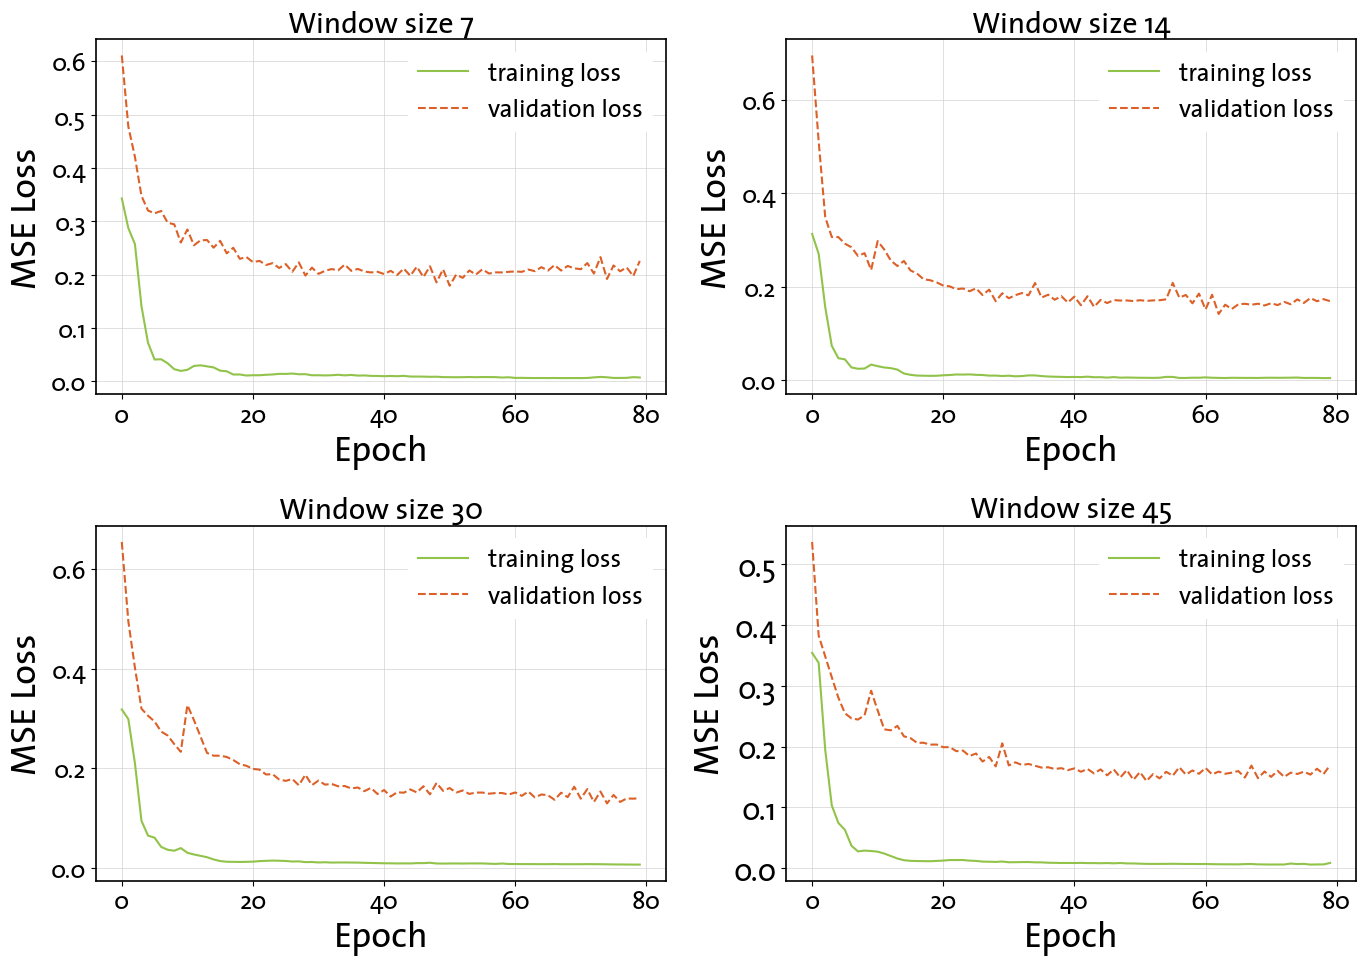

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
figure_path = figures_dir + "Window_size_tuning.png"
              
for i, ax in enumerate(axes.flatten()):
    df_row = windows_df.loc[i,].to_dict()

    train_data = df_row["training_curve"][:CUTOFF]
    val_data = df_row["validation_curve"][:CUTOFF]
    time = range(len(train_data))

    ax.plot(time, train_data, linestyle="-", label="training loss", color=uzh_colors["green"])
    ax.plot(time, val_data, linestyle="--", label="validation loss", color=uzh_colors["red"])

    ax.set_title(f"Window size {df_row['window_size']}")
    ax.set_ylabel("MSE Loss")
    ax.set_xlabel("Epoch")
    ax.legend()

    ax.grid(zorder=100, lw =0.5, color = 'lightgray')
    leg = ax.legend(frameon=True,facecolor='white', framealpha=1)
    frame = leg.get_frame()
    frame.set_linewidth(0)

# Adjust layout to prevent subplot overlap
fig.tight_layout()

plt.yticks(fontsize=22)
# plt.suptitle("Training and Validation Loss Curves for Different Window Sizes")
plt.tight_layout()
if save_fig:
    plt.savefig(figure_path, bbox_inches = 'tight')
plt.show()


## More Feature Groups as Input

### Number of hidden neurons and learning rate

In [10]:
df1 = pd.read_csv(tables_dir + "Simple/Benchmark_neurons_vs_lr_multi_data.csv")
df1 = utils.convert_string_arrays_in_df(df1)

save_fig = True
figure_path = figures_dir + "Learning_rate_vs_hidden_neurons_multi_data.png"


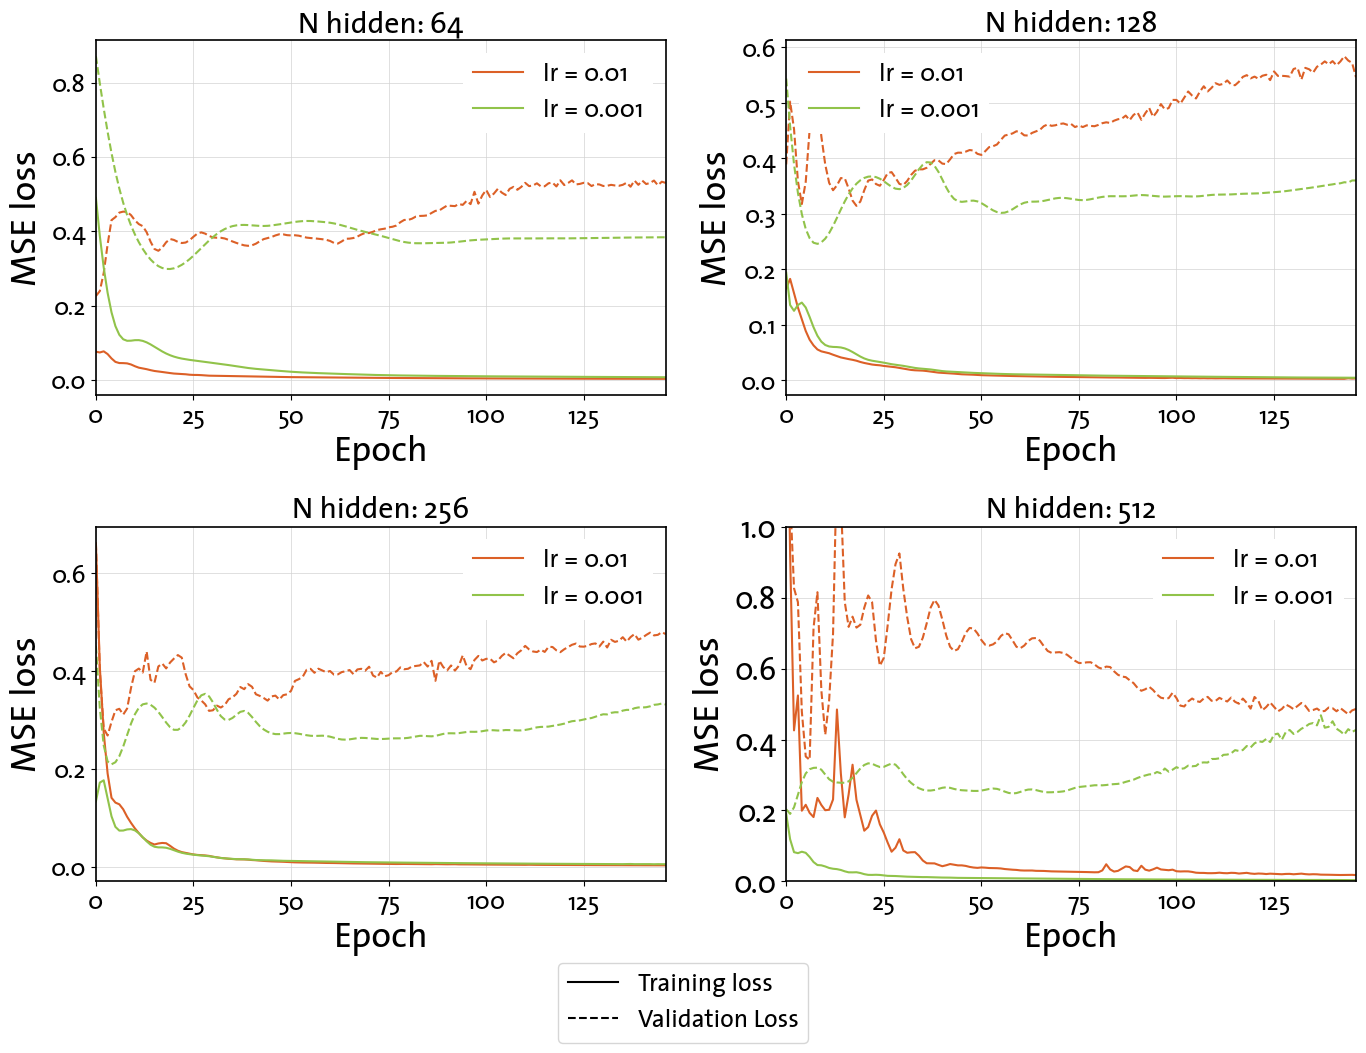

In [11]:
do_validation = True   
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))

# Define the color scheme for learning rates
colors= [uzh_colors["red"], uzh_colors["green"]]
colorscheme = {}
for i, lr in enumerate(sorted(df1.learning_rate.unique(), reverse=True)):
    colorscheme[lr] = colors[i]

hidden_nums = sorted(df1.hidden_neurons.unique())

for i, ax in enumerate(axes.flatten()):
    n_hidden = hidden_nums[i]
    rows = df1[df1.hidden_neurons == n_hidden].sort_values(by="learning_rate", ascending=False)
    
    for ir, row in rows.iterrows():
        data_train = row["training_curve"][3:]
        
        lr = row["learning_rate"]

        time = range(len(data_train))
        ax.plot(time, data_train, label=f'lr = {lr}', color = colorscheme[lr])

        if do_validation:
            data_val = row["validation_curve"][3:]
            ax.plot(time, data_val, label="_nolegend_", color = colorscheme[lr], linestyle='--')
    
    ax.set_title("N hidden: "+ str(n_hidden))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MSE loss")
    ax.set_xlim(min(time), max(time))

    ax.grid(zorder=100, lw =0.5, color = 'lightgray')
    leg = ax.legend(frameon=True,facecolor='white', framealpha=1)
    frame = leg.get_frame()
    frame.set_linewidth(0)

lines = [
    Line2D([], [], linestyle='-', label='Training loss', color='black'),
    Line2D([], [], linestyle='--', label='Validation Loss', color='black')
]

fig.legend(loc='center', bbox_to_anchor=(0.5, -0.02), handles = lines)

# Adjust layout to prevent subplot overlap
fig.tight_layout()

plt.yticks(fontsize=22)
plt.ylim((0,1))
# plt.suptitle("Training and Validation Loss Curves for Different Hyperparameter Combinations - Multiple Data Groups")
plt.tight_layout()

if save_fig:
    plt.savefig(figure_path, bbox_inches = 'tight')

plt.show()

## Complex model

In [27]:
df1 = pd.read_csv(tables_dir + "Complex/Complex_neurons2.csv")
df1 = utils.convert_string_arrays_in_df(df1)

save_fig = True
figure_path = figures_dir + "Hyperparameters_complex_model.png"

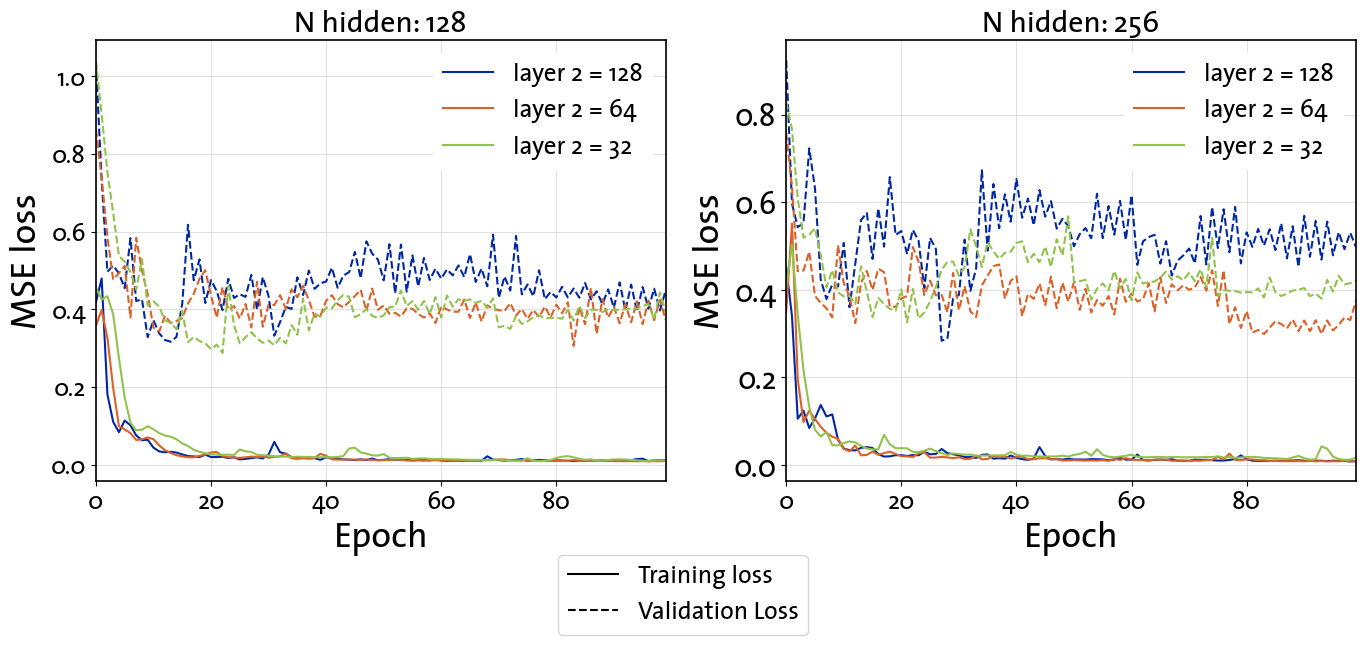

In [29]:
do_validation = True   
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14, 6))

# Define the color scheme for learning rates
colors= [uzh_colors["blue"], uzh_colors["red"], uzh_colors["green"]]
hidden_nums1 = sorted(df1.hidden_neurons_layer1.unique())

for i, n_hidden in enumerate(hidden_nums1):
    rows = df1[df1.hidden_neurons_layer1 == n_hidden].sort_values(by="hidden_neurons_layer2", ascending=False).reset_index()
    
    for ir, row in rows.iterrows():
        data_train = row["training_curve"]
        time = range(len(data_train))
        ax[i].plot(time, data_train, label=f'layer 2 = {row["hidden_neurons_layer2"]}', color = colors[ir])

        if do_validation:
            data_val = row["validation_curve"]
            ax[i].plot(time, data_val, label="_nolegend_", color = colors[ir], linestyle='--')
    
    ax[i].set_title("N hidden: "+ str(n_hidden))
    ax[i].set_xlabel("Epoch")
    ax[i].set_ylabel("MSE loss")
    ax[i].set_xlim(min(time), max(time))

    ax[i].grid(zorder=100, lw =0.5, color = 'lightgray')
    leg = ax[i].legend(frameon=True,facecolor='white', framealpha=1)
    frame = leg.get_frame()
    frame.set_linewidth(0)

lines = [
    Line2D([], [], linestyle='-', label='Training loss', color='black'),
    Line2D([], [], linestyle='--', label='Validation Loss', color='black')
]

fig.legend(loc='center', bbox_to_anchor=(0.5, -0.02), handles = lines)

# Adjust layout to prevent subplot overlap
fig.tight_layout()

plt.yticks(fontsize=22)
# plt.suptitle("Training and Validation Loss Curves for Different Hidden Layer Sizes - Complex Model")
plt.tight_layout()

if save_fig:
    plt.savefig(figure_path, bbox_inches = 'tight')

plt.show()

### Num heads

In [30]:
df1 = pd.read_csv(tables_dir + "Complex/Complex_num_heads.csv")
title = "Training and Validation Loss Curves for Different Attention Head Numbers"
df1 = utils.convert_string_arrays_in_df(df1)

save_fig = True
figure_path = figures_dir + "Num_heads_complex_model.png"

df1 = df1.sort_values(by="num_heads").reset_index(drop = True)


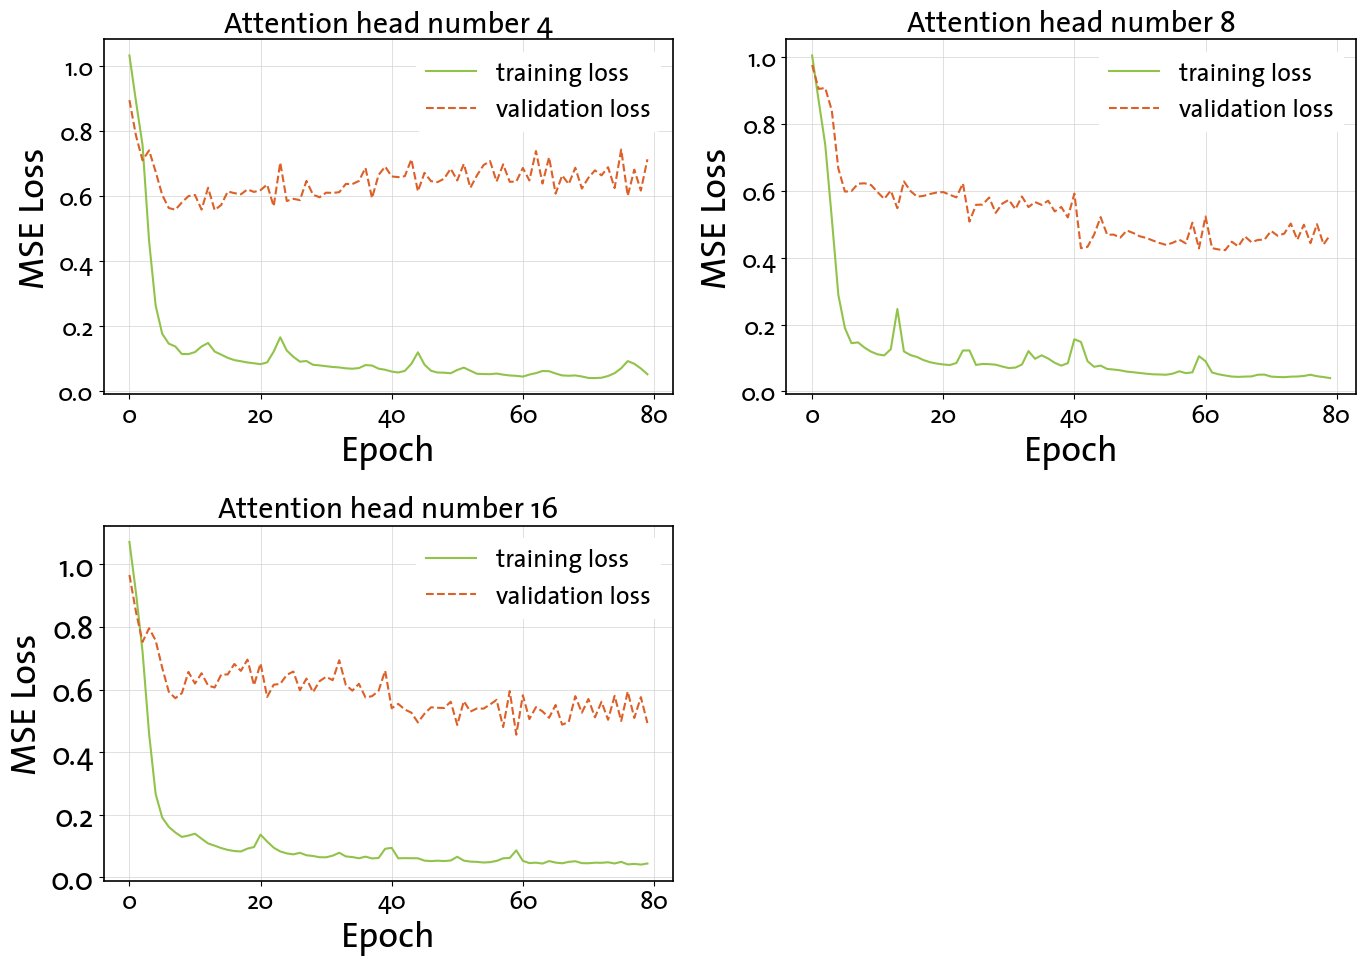

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
              
for i, row in df1.iterrows():

    df_row = row.to_dict()

    train_data = df_row["training_curve"]
    val_data = df_row["validation_curve"]
    time = range(len(train_data))

    j , k = i//2, i%2     

    axes[j,k].plot(time, train_data, linestyle="-", label="training loss", color=uzh_colors["green"])
    axes[j,k].plot(time, val_data, linestyle="--", label="validation loss", color=uzh_colors["red"])

    axes[j,k].set_title(f"Attention head number {df_row['num_heads']}")
    axes[j,k].set_ylabel("MSE Loss")
    axes[j,k].set_xlabel("Epoch")
    axes[j,k].legend()

    axes[j,k].grid(zorder=100, lw =0.5, color = 'lightgray')
    leg = axes[j,k].legend(frameon=True,facecolor='white', framealpha=1)
    frame = leg.get_frame()
    frame.set_linewidth(0)

fig.delaxes(axes[1,1])

# Adjust layout to prevent subplot overlap
fig.tight_layout()

plt.yticks(fontsize=22)
# plt.suptitle(title)
plt.tight_layout()
if save_fig:
    plt.savefig(figure_path, bbox_inches = 'tight')
plt.show()
